Bank Churn Analysis

# Imports

In [14]:
# For data manipulation
import numpy as np
import pandas as pd

In [15]:
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Load Dataset**

In [17]:
# Load dataset into a dataframe
df = pd.read_csv('data\churn_data.csv')

# Display first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Discovery

In [18]:
# How large is he dataset
df.size

140000

In [19]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Dataset contains 14 variables and 10000 rows, totaling to 140,000 values. 
- Each row represents a bank customer while the columns stores the customer's bank information
- There are 7 Numeric variables: RowNumber, CustomerId ,CreditScore, Age, Tenure, Balance, Estimated Salary   
- There are 6 categorical variables: Gender, Geography, NumOfProducts, HasCrCard, IsActiveMember, Exited. 
- There is 1 text variable: Surname

**Quick Stats**

In [20]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- `Credit Score` ranges from 350 - 850 with a slight skew to the left
- Customers `age` ranges from 18 - 92 and averages around 38 years old. 
- On average, customers `tenure` is around 5 years 
- On average, the customers' account `balance` ranges from $0 to $250K.
- Customers' `estimated salary` ranges from $11.58 to $199K

# Data Cleaning

**Drop variables**
- The `CustomerId` and `Surname` variable has sensitive customer data and should be removed to maintain confidentally. 
- `Gender` should also be removed as it would be discrimatory to offer promotions based on gender.
- `RowNumber` can also be removed has it is just a counter. 

In [21]:
df = df.drop(['CustomerId','Surname','RowNumber','Gender'],axis=1)
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


**Check for missing values**

In [22]:
print('Missing values per column:')
df.isna().sum()

Missing values per column:


CreditScore        0
Geography          0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing values in the dataset.

**Check for duplicates**

In [23]:
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

df_row = len(df)
df_row_no_dupe = len(df.drop_duplicates())
df_row_dupe = df_row - df_row_no_dupe

print('No. of rows with duplicates :', df_row_dupe)

Shape of dataframe: (10000, 10)
Shape of dataframe with duplicates dropped: (10000, 10)
No. of rows with duplicates : 0


**Check for outliers**

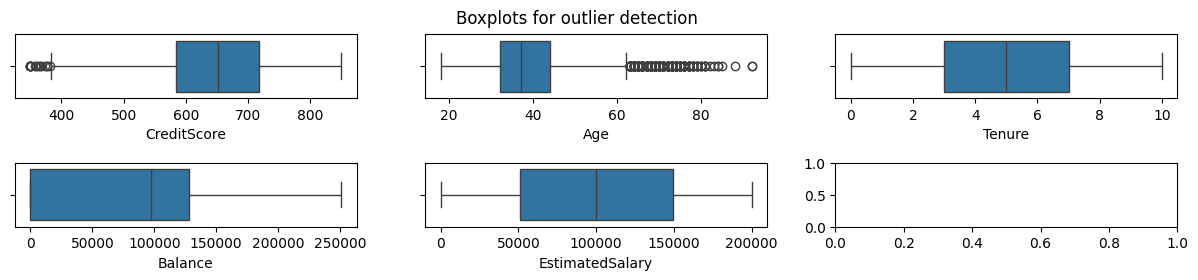

In [24]:
# create 2 row x 3 column figure
fig, axes = plt.subplots(2, 3, figsize=(15, 2.5))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0,0], x=df['CreditScore'])
sns.boxplot(ax=axes[0,1], x=df['Age'])
sns.boxplot(ax=axes[0,2], x=df['Tenure'])

# add spacing between the rows
plt.subplots_adjust(hspace=1
                    # left=0.1,
                    # bottom=0.1, 
                    # right=0.9, 
                    # top=0.9, 
                    # wspace=0.4
                    ) 

sns.boxplot(ax=axes[1,0], x=df['Balance'])
sns.boxplot(ax=axes[1,1], x=df['EstimatedSalary'])
plt.show();

- `CreditScore` has some outliers where scores are under 400
-  Customers over `Age` 60 are outliers. 

# Variable Analysis

### Exited

Target Variable = `Exited`

**Class Imbalance**

In [25]:
# Get percentage of distinct values
df['Exited'].value_counts(normalize=True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

- Of 10,000 customers, at least 20% of the customers have Exited
- Since `Exited` feature is categorical, check class imbalance
- When predicting a categorical target, problems can arise when the class distribution is highly imbalanced. 
- `Exited` is split ~80-20 which is imbalance but is still fine.

### CreditScore

mean 651


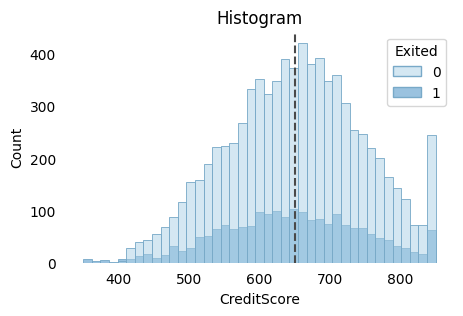

In [26]:
# Plot Histogram
fig = plt.figure(figsize=(5,3))
ax = sns.histplot(x=df['CreditScore'], hue=df['Exited'], palette='Blues', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')

#Calculate and display mean 
mean = df['CreditScore'].mean()
print('mean',f'{mean:.0f}')
plt.axvline(mean, color='#494949', linestyle='--')
None

- CreditScore has a relatively normal distribution, with mean around a score of 651. 
- A little more than 300 customers achieved perfect Credit Score 


According to FICO, Credit Score rating as categorized as follows
- Very poor: 300 to 579
- Fair: 580 to 669
- Good: 670 to 739
- Very good: 740 to 799
- Excellent: 800 to 850

#### CreditRating

Create a new variable `CreditRating` to assign each CreditScore to a rating

In [27]:
# Create a new 'CreditRating' variable and assign based FICO ranges

df['CreditRating'] = np.select(
    [df['CreditScore'] <=579,
     df['CreditScore'].between(580, 669),
     df['CreditScore'].between(670, 739),
     df['CreditScore'].between(740, 799),
     df['CreditScore'].between(800, 859)],
    ['Very Poor', 'Fair', 'Good', 'Very Good','Excellent']
    )

df[['CreditScore','CreditRating']].head()

,CreditScore,CreditRating
0,619,Fair
1,608,Fair
2,502,Very Poor
3,699,Good
4,850,Excellent


**Plot CreditRating vs Exited**

Let's see the churn rate for each Credit Rating

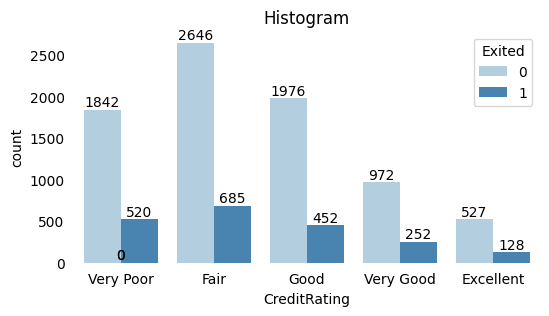

In [28]:
# Histogram

fig = plt.figure(figsize=(6,3))
ax = sns.countplot(x=df['CreditRating'], order=['Very Poor', 'Fair', 'Good', 'Very Good','Excellent'], hue=df['Exited'],palette="Blues")
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')


# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')
None

- Customers with 'Fair' credit rating has the highest churn count at 685, followed by 520 with 'Very Poor' and 452 with 'Good' credit rating, respectively. 

Let's calculate the churn rate for each rating based on the total count.

In [29]:
# Calculate churn rate
ratings = df['CreditRating'].unique().tolist()

for rating in ratings:
    count = df[(df['CreditRating'] == rating)].shape[0]
    Exited_count = df[(df['CreditRating'] == rating) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f'Percent Exited in {rating} {percent_Exited:.1f}%')


Percent Exited in Fair 20.6%
Percent Exited in Very Poor 22.0%
Percent Exited in Good 18.6%
Percent Exited in Excellent 19.5%
Percent Exited in Very Good 20.6%


- The highest churn rate occurs when the customer has a 'Very Poor' credit rating. 
- Whereas the churn rate for 'Fair' ranked 2nd at 20.6% although it had the highest count of Exited customers. 
- In general, all credit ratings experience similar churn rates averaging around ~20%. 
- Are they dependencies between very poor credit card and whether the customer has a credit card or not?

#### Credit Score vs. HasCrCard

mean 651


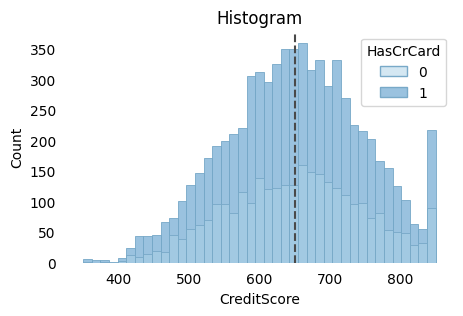

In [30]:
# Plot Histogram
fig = plt.figure(figsize=(5,3))
ax = sns.histplot(x=df['CreditScore'], hue=df['HasCrCard'], palette='Blues', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')

#Calculate and display mean 
mean = df['CreditScore'].mean()
print('mean',f'{mean:.0f}')
plt.axvline(mean, color='#494949', linestyle='--')
None

- The customers' credit score has a normal distribution regardless if the customer has a credit card or not. However, there are more customers with a credit card. 
- Therefore, having a credit card or not does not affect a customer's credit score.

## HasCrCard

In [31]:
# Separate numerical and categorical variables into different df
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

70% of the customers have a credit card

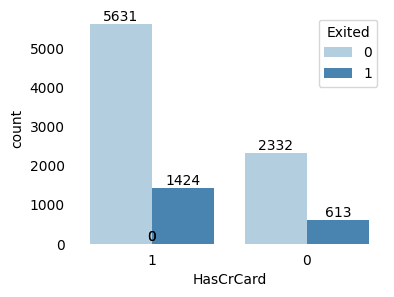

In [32]:
fig = plt.figure(figsize=(4,3))
ax = sns.countplot(x=df['HasCrCard'], order=df['HasCrCard'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement
    ax.text(x, y, label, ha='center', va='bottom')

    None

Calculate churn rate for customers with and without credit cards

In [33]:
# Get unique HasCrCard values and save as list
cards = df['HasCrCard'].unique().tolist()

# loop through list and calculate churn rate
for card in cards:
    count = df[(df['HasCrCard'] == card)].shape[0]
    Exited_count = df[(df['HasCrCard'] == card) & (df['Exited'] == 1)].shape[0]
    Percent_Exited = (Exited_count/count) * 100
    print(f' When customer HasCrCard = {card}, {Exited_count} left out of {count}, therefore % Exited = {Percent_Exited:.1f}%')


 When customer HasCrCard = 1, 1424 left out of 7055, therefore % Exited = 20.2%
 When customer HasCrCard = 0, 613 left out of 2945, therefore % Exited = 20.8%


- The number of customers who has a credit card and left (1424) are more then 2x those without cards and left (613).
- However, when considering the total customer in each group, 7055 with cards and and 2945 without cards, the churn rates are around 20% for both. 
- This variable, HasCrCard is not likely to be a good indicator of whether a customer would churn or not

## Age

Text(0.5, 1.0, 'Histogram')

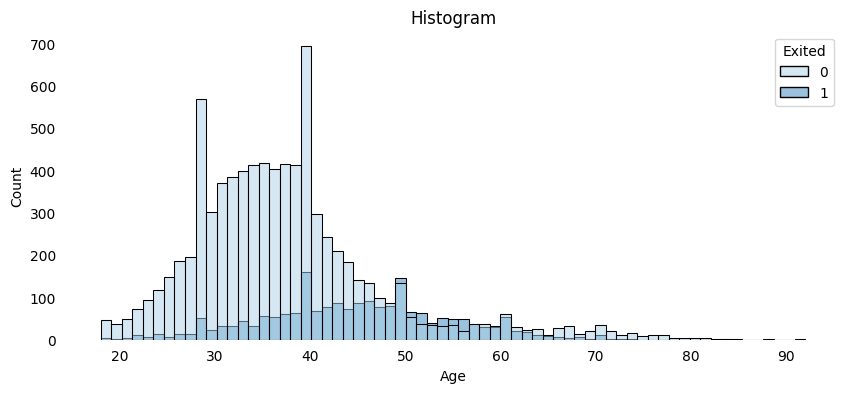

In [34]:
# Plot Histogram
fig = plt.figure(figsize=(10,4))
ax = sns.histplot(x=df['Age'], hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')

- The age of customers who stayed has a right skewed distribution whereas the age for customers who churned has a more normal distribution
- In other words, younger customers around 30-40 years ago are more likely to stay. 

**Replot by grouping age in bins** for cleaner visualization

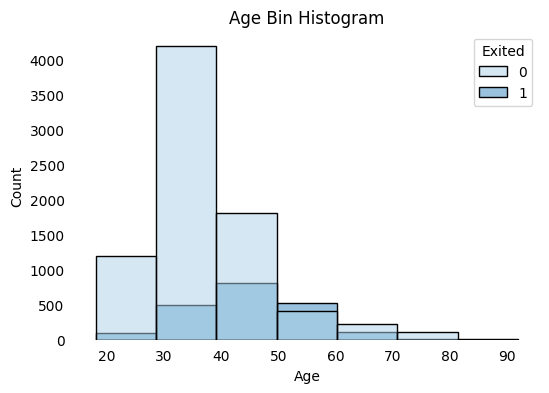

In [35]:
# Plot Histogram
fig = plt.figure(figsize=(6,4))
ax = sns.histplot(x=df['Age'], hue=df['Exited'], palette='Blues', binwidth=10)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Age Bin Histogram')

None

- This confirms the previous observation but in cleaner format. 
- Customers' age follow a right skewed distribution with majority between 30-40 years old. 
- Highest churn count (~700) occurs in the 40-50 age group 

Let's look at Balance by Age 

In [36]:
# create interval range 
interval_range = pd.interval_range(start=10, freq=10, end=100)

#create a new column applying the bins
df['AgeBins'] = pd.cut(df['Age'], bins=interval_range, labels=[1,2,3])

#show original and new column with bins
df[['Age','AgeBins']].head()

,Age,AgeBins
0,42,"(40, 50]"
1,41,"(40, 50]"
2,42,"(40, 50]"
3,39,"(30, 40]"
4,43,"(40, 50]"


### Age Vs Balance

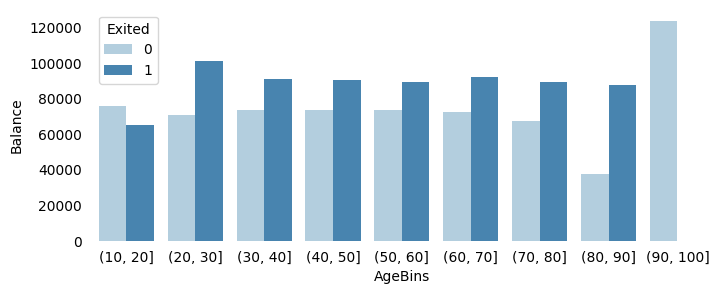

In [37]:
fig = plt.figure(figsize=(8,3))
ax = sns.barplot(x=df['AgeBins'], y=df['Balance'], estimator='mean', hue=df['Exited'], palette='Blues',errorbar=None)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
None

- The customer's account balance has a uniform distribution across the age groups
- For the majority of the age groups, customers with Balances over $90K have Exited.
    - Are there less interests/perks after reaching accumulating $90K?
    - Can look at increasing perks once customers reach $90K balance to retain customers. 

Let's calculate that mean balance for customers who has left.

In [38]:
# Calculate the mean
print('Average Balance:')
print('')
print( df.groupby('Exited')['Balance'].mean())
print('')

# Calculate the total balance and print
print('Total Balance:')
print('')
print(df.groupby('Exited')['Balance'].sum())

Average Balance:

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

Total Balance:

Exited
0    5.792708e+08
1    1.855881e+08
Name: Balance, dtype: float64


- On average, customers who left the bank, took with them around $91K in balance. 
- In total, the customers who left took ~185M with them!
- This is a significant loss for the bank.

## Balance

mean 76486


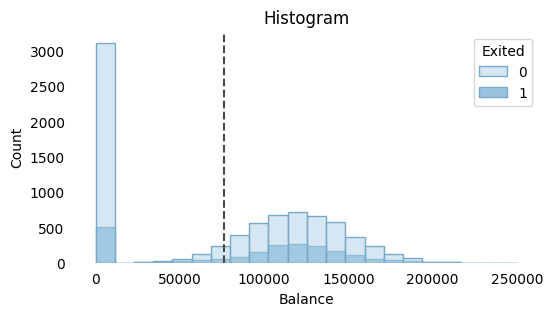

In [39]:
# Plot Histogram
fig = plt.figure(figsize=(6,3))
ax = sns.histplot(x=df['Balance'], hue=df['Exited'], palette='Blues', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')

#Calculate and display mean 
mean = df['Balance'].mean()
print('mean',f'{mean:.0f}')
plt.axvline(mean, color='#494949', linestyle='--')
None

- Over 3500 customers or 35% of the customers have 0 balance. 
- If these customers are excluded, the balance data would follow a normal distribution
- What would cause customers to have bank account with no balance? Are they transferring money out of their account in preparation to exit? 
- Let's take a deeper dive into customers with 0 balance.

**Filter customers with zero Balance**

In [40]:
# Create a Boolean mask 
mask = (df['Balance'] == 0)   
df_mask = df[mask]
df_mask.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating,AgeBins
0,619,France,42,2,0.0,1,1,1,101348.88,1,Fair,"(40, 50]"
3,699,France,39,1,0.0,2,0,0,93826.63,0,Good,"(30, 40]"
6,822,France,50,7,0.0,2,1,1,10062.80,0,Excellent,"(40, 50]"
11,497,Spain,24,3,0.0,2,1,0,76390.01,0,Very Poor,"(20, 30]"
12,476,France,34,10,0.0,2,1,0,26260.98,0,Very Poor,"(30, 40]"


**Plot**

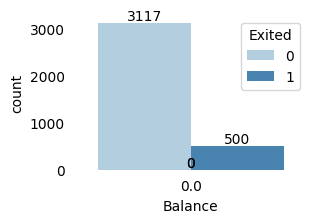

In [41]:
fig = plt.figure(figsize=(3,2))
ax = sns.countplot(x=df_mask['Balance'], hue=df_mask['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')
    None

- 500 customers with no balance have Exited. 
- Considering around a total of 2000 customers have Exited, this is ~25% of the total customers who has Exited, which is an large amount!
- Let's look at other variables to determine if they have any cause/effect relationship with customers who have no balance in their account


**Create another mask for customers with 0 balance and have Exited**

In [42]:
# Create a Boolean mask 
mask = (df['Balance'] == 0) &  (df['Exited'] == 1)
df_mask_churn = df[mask]
df_mask_churn.head()


,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating,AgeBins
0,619,France,42,2,0.0,1,1,1,101348.88,1,Fair,"(40, 50]"
22,510,Spain,38,4,0.0,1,1,0,118913.53,1,Very Poor,"(30, 40]"
30,591,Spain,39,3,0.0,3,1,0,140469.38,1,Fair,"(30, 40]"
58,511,Spain,66,4,0.0,1,1,0,1643.11,1,Very Poor,"(60, 70]"
81,777,France,32,2,0.0,1,1,0,136458.19,1,Very Good,"(30, 40]"


C:\Users\tunhi\AppData\Local\Temp\ipykernel_8920\993373412.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axes[1,1], x=df_mask_churn['CreditScore'], palette='Blues', binwidth=100)


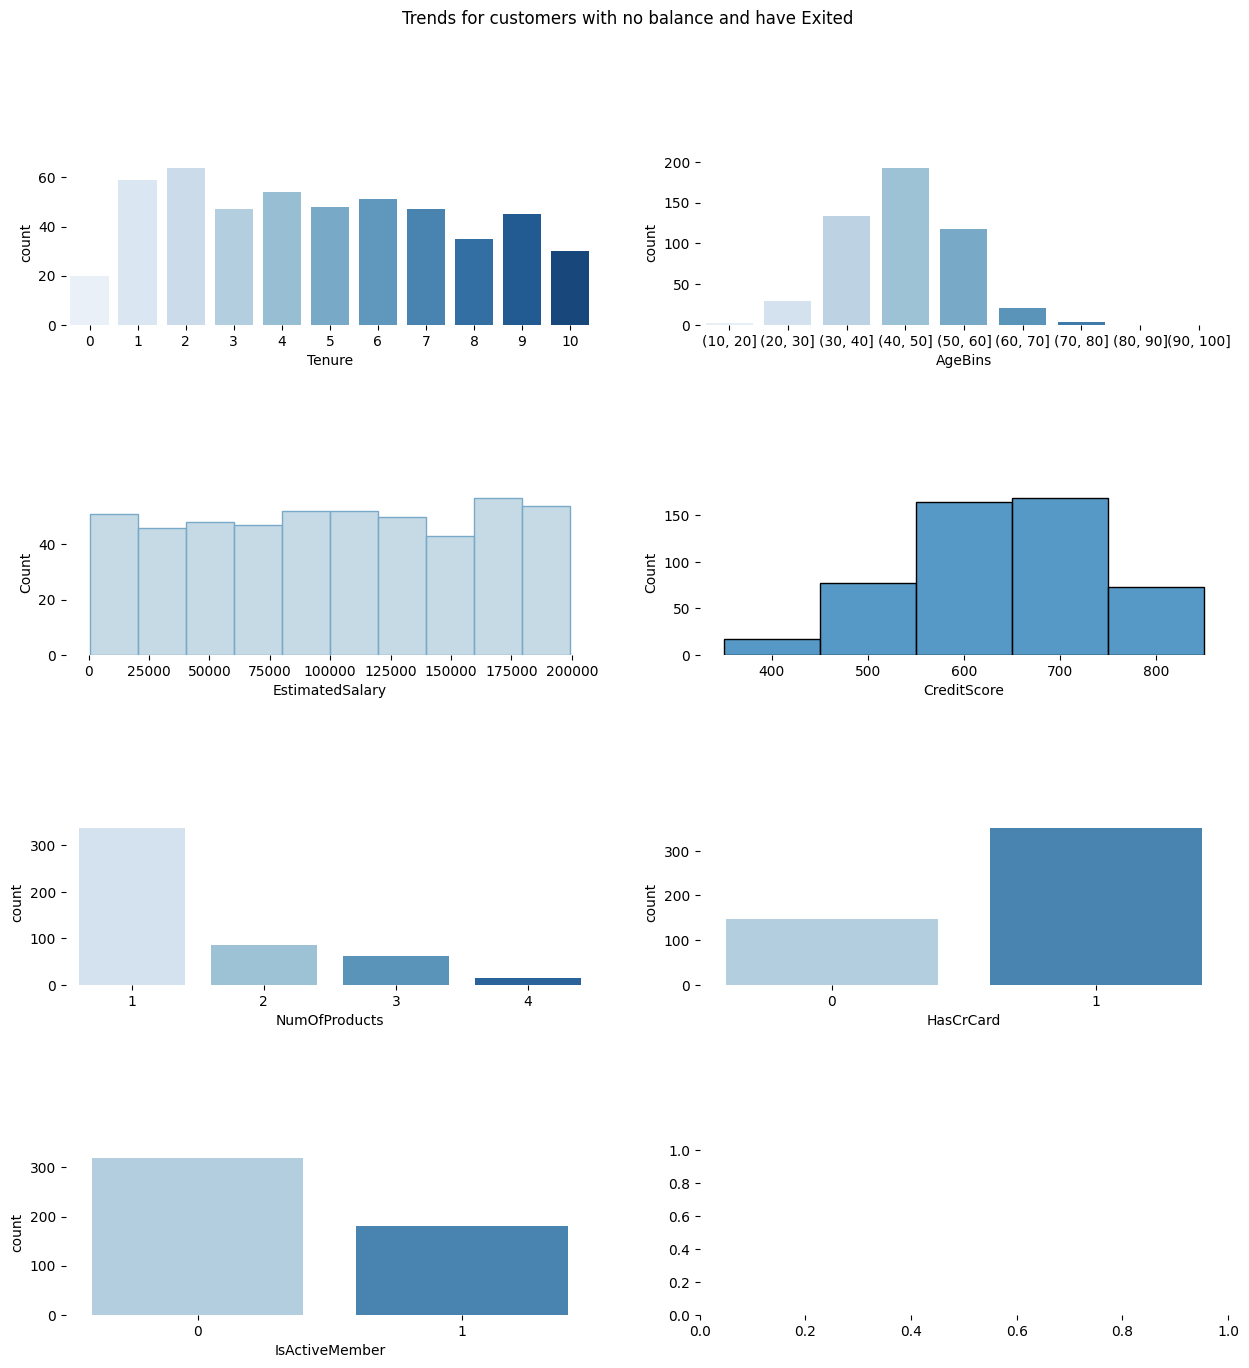

In [43]:
# create 4 row x 2 column figure
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Trends for customers with no balance and have Exited')
sns.countplot(ax=axes[0,0], x=df_mask_churn['Tenure'], palette='Blues')
sns.countplot(ax=axes[0,1], x=df_mask_churn['AgeBins'], palette='Blues')
sns.histplot(ax=axes[1,0], x=df_mask_churn['EstimatedSalary'], color='#b3cede', edgecolor='#78a9c8')
sns.histplot(ax=axes[1,1], x=df_mask_churn['CreditScore'], palette='Blues', binwidth=100)
sns.countplot(ax=axes[2,0], x=df_mask_churn['NumOfProducts'], palette='Blues')
sns.countplot(ax=axes[2,1], x=df_mask_churn['HasCrCard'], palette='Blues')
sns.countplot(ax=axes[3,0], x=df_mask_churn['IsActiveMember'], palette='Blues')


# Remove ticks
ax.tick_params(left=False, bottom=False) 

# Remove borders borders
sns.despine(left=True, bottom=True) 

# add spacing between the rows
plt.subplots_adjust(hspace=1
                    # left=0.1,
                    # bottom=0.1, 
                    # right=0.9, 
                    # top=0.9, 
                    # wspace=0.4
                    ) 

plt.show();

Some noticeable observations for the 500 customers who left with no balance in their account....
- ~140 customers left between 0-2 years.
- ~200 are around 30-40 years old
- 300+ only has 1 product with the bank
- 300+ have a credit card
- 300+ are not an active number

For now, having a credit card, only 1 product and inactivity has the strongest link to customers with 0 balance.

## IsActiveMember


In [44]:
# Separate numerical and categorical variables into different df
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

Little more than half of the customers (5151) are active and the rest (4849) are inactive

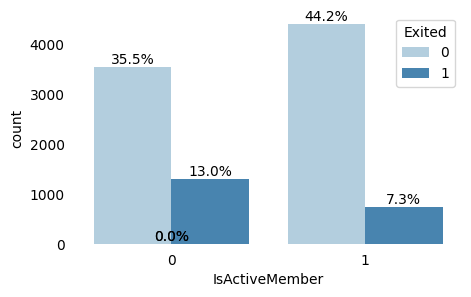

In [45]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['IsActiveMember'], hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')


In [46]:
# Calculate churn rate
activeness = df['IsActiveMember'].unique().tolist()

for active in activeness:
    count = df[(df['IsActiveMember'] == active)].shape[0]
    Exited_count = df[(df['IsActiveMember'] == active) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f" When customer's activeness = {active}, the % Exited = {percent_Exited:.1f}%" )


 When customer's activeness = 1, the % Exited = 14.3%
 When customer's activeness = 0, the % Exited = 26.9%


- Nonactive members are almost 2x more likely to churn compared to Active customers. 

## NumOfProducts

In [47]:
# Separate numerical and categorical variables into different df
df['NumOfProducts'].value_counts(normalize=True)*100

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64

There are up to 4 number of products a customer can hold. over 96% of customers have 1-2 products and only 3% has 3-4 products.

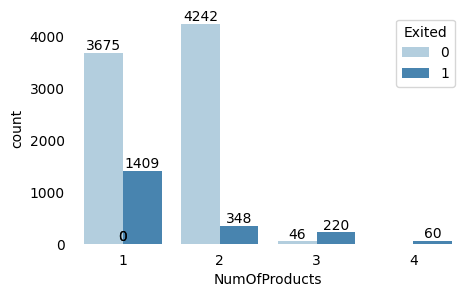

In [48]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['NumOfProducts'], order=df['NumOfProducts'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

In [49]:
# Calculate churn rate
products = df['NumOfProducts'].sort_values(ascending=True).unique().tolist()

for product in products:
    count = df[(df['NumOfProducts'] == product)].shape[0]
    Exited_count = df[(df['NumOfProducts'] == product) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f" When customer has {product} product, % Exited = {percent_Exited:.1f}%" )


 When customer has 1 product, % Exited = 27.7%
 When customer has 2 product, % Exited = 7.6%
 When customer has 3 product, % Exited = 82.7%
 When customer has 4 product, % Exited = 100.0%


- Customers with 1 product has the highest count of customer churns (1409) which is more than half of the 2037 customers who has churned.
- Customers with 2 products has the lowest churn rate at 7.6% or 348 customers
- Customers and 3 or more products are highly likely to churn. 
- All customers with 4 products have churned 
- Suggestions
    - Promote deals/perks for customers with 1 product to sign up for a 2nd.
    - Investigate factors that causes customers to churn after getting 3-4 products
        - Is it difficult to manage? 
        - Can phone apps be altered to improve customer experience?
       

## Geography

In [50]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

- Customers are from 3 countries: France, Germany, and Spain. 
- Over half are customers from France and the rest are split almost evenly between Germany and Spain

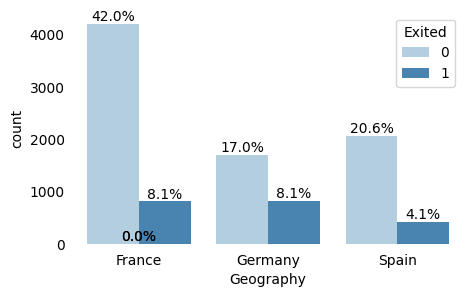

In [51]:
# Plot histogram
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['Geography'], order=df['Geography'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- Both France and Germany have similar number of customers who has churned 
- However, it's more severe in Germany.

In [52]:
# Calculate churn rate for each country
countries = df['Geography'].unique().tolist()

for country in countries:
    count = df[(df['Geography'] == country)].shape[0]
    Exited_count = df[(df['Geography'] == country) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f'Percent Exited in {country} {percent_Exited:.1f}%')


Percent Exited in France 16.2%
Percent Exited in Spain 16.7%
Percent Exited in Germany 32.4%


- Germany has the highest churn percentage at ~32%
- Whereas France and Spain are similar around ~16%

Based on this calculation, improvement efforts should be carried out in Germany to increase retention rate. 

- But let's check average customer balance for each country to gain additional insight

## Geography vs Balance

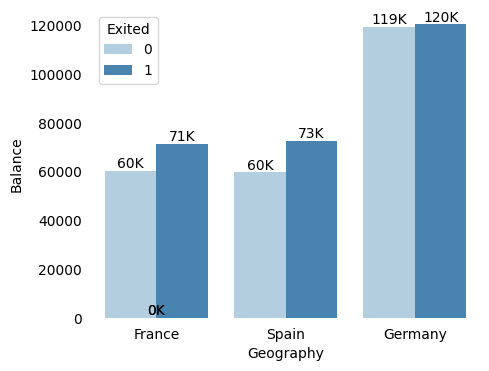

In [53]:
fig = plt.figure(figsize=(5,4))
ax = sns.barplot(x=df['Geography'], y=df['Balance'], hue=df['Exited'], palette='Blues', errorbar=None)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f'{height/1000:.0f}K'

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- In Germany, balance for Exited customers reached 120K, which is 50% of the total balance in Germany!
- Despite having the most customers, France's balance is just half of Germany's
- This validates the significance of prioritizing improvements in Germany

## Estimated Salary

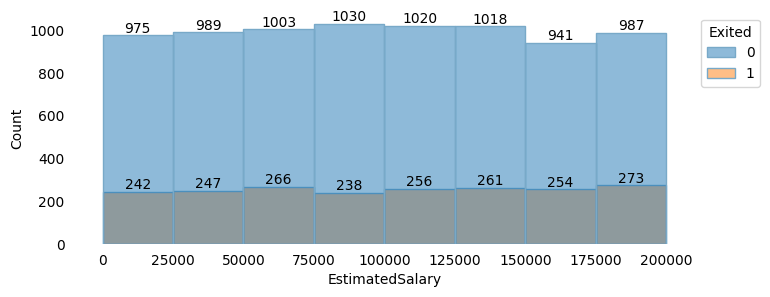

In [54]:
fig = plt.figure(figsize=(8,3))
ax = sns.histplot(x=df['EstimatedSalary'], hue=df['Exited'], binwidth=25000,color='Blues', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # legend location

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- There's a uniform distribution of salary across athe dataset 
- around 250 or 25% of customers from any salary range churned.


## Tenure

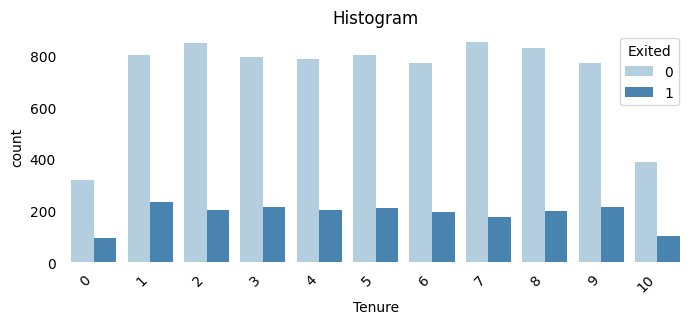

In [55]:
# Plot Histogram
fig = plt.figure(figsize=(8,3))
ax = sns.countplot(x=df['Tenure'], hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
plt.xticks(rotation=45, ha='right')
None

- There's a uniform distribution for tenure. 
- Except for year 1 and year 10, the churn amount hovers around 200 people every year. 
- In summary, the churn rate doesnt seem to be affected by tenure. 

## EDA Summary

Target Variable is Exited
- Of 10,000 customers, at least 20% of the customers have Exited
- Since `Exited` feature is categorical, check class imbalance
- `Exited` is split ~80-20 which is imbalance but is still fine.


**Variables with potential impact on churn rate**
-  Age 
    - majority of customers are 30-40 years old.
    - Highest churn count is between 40-50 age group 
    - For the majority of the age groups, customers with Balances over $90K have Exited.
    - Are there less interests/perks after reaching accumulating $90K?
- Balance 
    - Over 3500 customers or 35% of the customers have 0 balance.
    - 500 customers with no balance have Exited. 
    - Considering around a total of 2000 customers have Exited, this is ~25% of the total customers who has Exited, which is an large amount!
    - Having a credit card, only 1 product and inactivity has the strongest link to customers who left with 0 balance in their account.
- Active Members
    - Nonactive members are almost 2x more likely to churn compared to Active customers. 
- Num Of Products
    - Customers with 1 product has the highest count of customer churns (1409) which is more than half of the 2037 customers who has churned. 
- Geography 
    - Germany has the highest churn percentage at ~32%, whereas France and Spain are similar around ~16%
    - In Germany, balance amount for Exited customers reached 120K, which is 50% of the total balance in Germany!
    - Despite having the most customers, France's balance is just half of Germany's

**Variables with minimal impact on churn rate**
- Churn rate is uniform across tenure period, credit ratings. having a credit card, and Estimated Salary, which means this variables have little influence on churn rate.

**Recommendations for Customer Retention**
- Prioritizing retention activities in Germany
- Can look at increasing perks once customers reach $90K balance to retain customers.
- One suggestion could be to promote deals/perks if customers sign up for another product as they are less likely to churn if they have at least 2 products with the bank. 



# Feature Engineering

## Feature Transformation

First, encode categorical variables: Geography

In [57]:
# create a copy of df and assign new name
df_code = df.copy()
df_code.head()


,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating,AgeBins
0,619,France,42,2,0.00,1,1,1,101348.88,1,Fair,"(40, 50]"
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,Fair,"(40, 50]"
2,502,France,42,8,159660.80,3,1,0,113931.57,1,Very Poor,"(40, 50]"
3,699,France,39,1,0.00,2,0,0,93826.63,0,Good,"(30, 40]"
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,Excellent,"(40, 50]"


**Geography**

In [58]:
# Convert categorical variables to numerical variables
df_code = pd.get_dummies(df_code, drop_first=False, columns=['Geography'])
df_code.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating,AgeBins,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,Fair,"(40, 50]",True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,Fair,"(40, 50]",False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,Very Poor,"(40, 50]",True,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,Good,"(30, 40]",True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,Excellent,"(40, 50]",False,False,True


## Feature Selection

In [59]:
df_code.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'CreditRating',
       'AgeBins', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

**Drop redundant columns**

In [60]:
df_code = df_code.drop(['AgeBins','CreditRating'],axis=1)

### Correlation Matrix

**Heatmap**

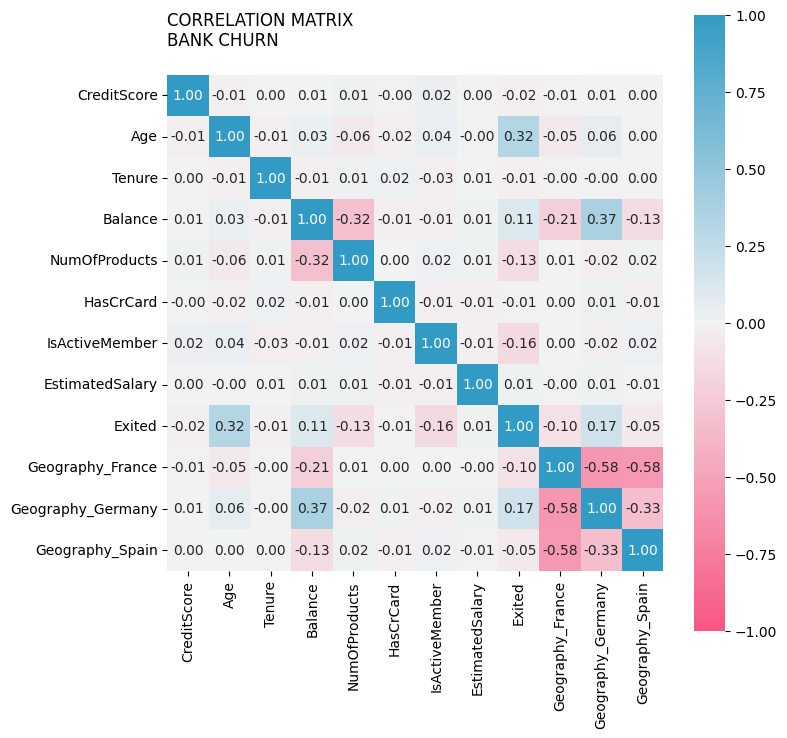

In [61]:
# Create heatmap to check correlation between variables
plt.figure(figsize=(8, 8))

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


# If not dropping any variables use df.corr()
sns.heatmap(df_code.corr(method='spearman'), 
            square=True, 
            fmt=".2f", 
            annot=True, 
            vmin = -1, 
            vmax = 1, 
            cmap=cmap)

ax.set_ylim([0,2])
ax.set_xlim([0,2])
# plt.xticks([-6.5,1.5],labels=[1,0])
# plt.yticks([-6.5,1.5],labels=[1,0])

# title
title = 'CORRELATION MATRIX\nBANK CHURN\n'
plt.title(title, loc='left', fontsize=12)

# Display plot
plt.show()

Positive Correlations
- 0.37: Geography_Germany & Balance
- 0.32: Exited & Age
- 0.17: Exited & Geography_Germany
- 0.11: Exited & Balance

Negative Correlations
- -0.32: NumofProducts & Balance
- -0.16: Exited & IsActiveMember
- -0.13: Exited & NumOfProducts
- -0.10: Exited & Geography_France

This also supports our observation that the following features have low correlation to the target variable
- Tenure
- HasCrCard
- CreditScore
- Estimated Salary

### Features Selected

- Target: Exited
- Predictive: Age, IsActiveMember, Geography_Germany, Balance, NumOfProducts, 

In [62]:
# Create a new df for modeling
df_model = df_code.copy()
df_model.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


# Evaluation Metric

Scenarios
1. False Positive: When model predicts a customer will churn but they didnt.
2. False Negative: When the model predicts customer will NOT churn but they do.

Worst case: 
- False Negative! On average, bank loses $91K for every customer lost.

Options
1. Recall: Because the cost of predicting **false negative** is higher. Can result in bias model that predicts everyone would churn.
2. f1: harmonic mean between recall and precision

Metric Selected
- f1 score

# Model 1: Decision Tree

### Imports

In [63]:
# import decision tree classifer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# This function displays the splits of the tree
from sklearn.tree import plot_tree

# imports evaluation metrics and confusion matrix
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

## Split Data

In [64]:
# Define the y (target) variable
y = df_model['Exited']

# Define the X (predictor) variables
X = df_model.drop('Exited', axis=1)

# Split the dat into training, validating, and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

**Print the shape of each output**

In [65]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.
print('X_train Shape:', X_train.shape)

# Print the shape of X_test.
print('X_test Shape:', X_test.shape)
print('')

# Print the shape of y_train.
print('y_train Shape:', y_train.shape)

# Print the shape of y_test.
print('y_test Shape:', y_test.shape)

X_train Shape: (7500, 11)
X_test Shape: (2500, 11)

y_train Shape: (7500,)
y_test Shape: (2500,)


## Baseline Model

In [66]:
# Instantiate the model
tree_base = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
tree_base.fit(X_train, y_train)

# Make predictions on test data
y_pred = tree_base.predict(X_test)

### Scores

In [67]:
# Get evaluation scores
ac_base = accuracy_score(y_test, y_pred)
f1_base = f1_score(y_test, y_pred)
rc_base = recall_score(y_test, y_pred)
pc_base = precision_score(y_test, y_pred)

print("Decision Tree Baseline Evaluation Scores:")
print('Accuracy:', '%.3f' % ac_base, "(of all cases in test set,", "{ac_pct:.1f}% are predicted true positive or true negative.)".format(ac_pct = ac_base * 100))
print('Precision:', '%.3f' %pc_base,"(of all positive predictions,", "{pc_pct:.1f}% prediction are true positive.)".format(pc_pct = pc_base * 100))
print('Recall:', '%.3f' % rc_base, "(of all real positive cases in test set,", "{rc_pct:.1f}% are predicted positive.)".format(rc_pct = rc_base * 100))
print('F1 Score:', '%.3f' % f1_base,"(the test set's harmonic mean is {f1_pct:.1f}%.)".format(f1_pct = f1_base * 100))

Decision Tree Baseline Evaluation Scores:
Accuracy: 0.795 (of all cases in test set, 79.5% are predicted true positive or true negative.)
Precision: 0.497 (of all positive predictions, 49.7% prediction are true positive.)
Recall: 0.528 (of all real positive cases in test set, 52.8% are predicted positive.)
F1 Score: 0.512 (the test set's harmonic mean is 51.2%.)


In [73]:
baseline_score = {
                  'model': 'decision tree baseline',
                  'precision': pc_base,
                  'recall': rc_base,
                  'F1': f1_base,
                  'accuracy': ac_base,
}
baseline_results =pd.DataFrame(baseline_score,index=[1])
baseline_results

,model,precision,recall,F1,accuracy
1,decision tree baseline,0.497227,0.528487,0.512381,0.7952


### Save Results

In [74]:
# Save results table as csv
results = baseline_results
results.to_csv("models/model_results_table.csv")
results

,model,precision,recall,F1,accuracy
1,decision tree baseline,0.497227,0.528487,0.512381,0.7952


### Confusion Matrix

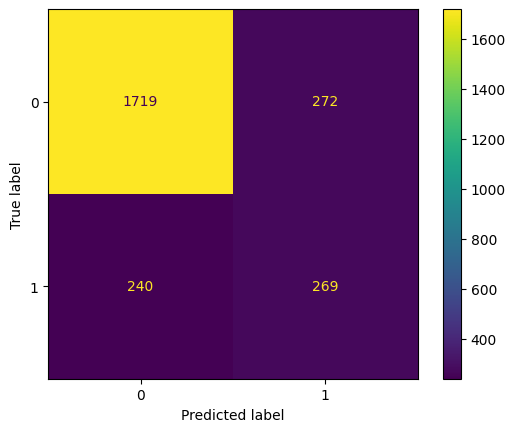

In [75]:
# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Plot the visual in-line.
disp.plot()

In [76]:
# Print confusion matrix results
tn, fp, fn, tp = cm.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


# Print shape of test data
print('')
print("Total Test Data:", tn+fp+fn+tp)

True Negatives:  1719
False Positives:  272
False Negatives:  240
True Positives:  269

Total Test Data: 2500


### Plot Tree

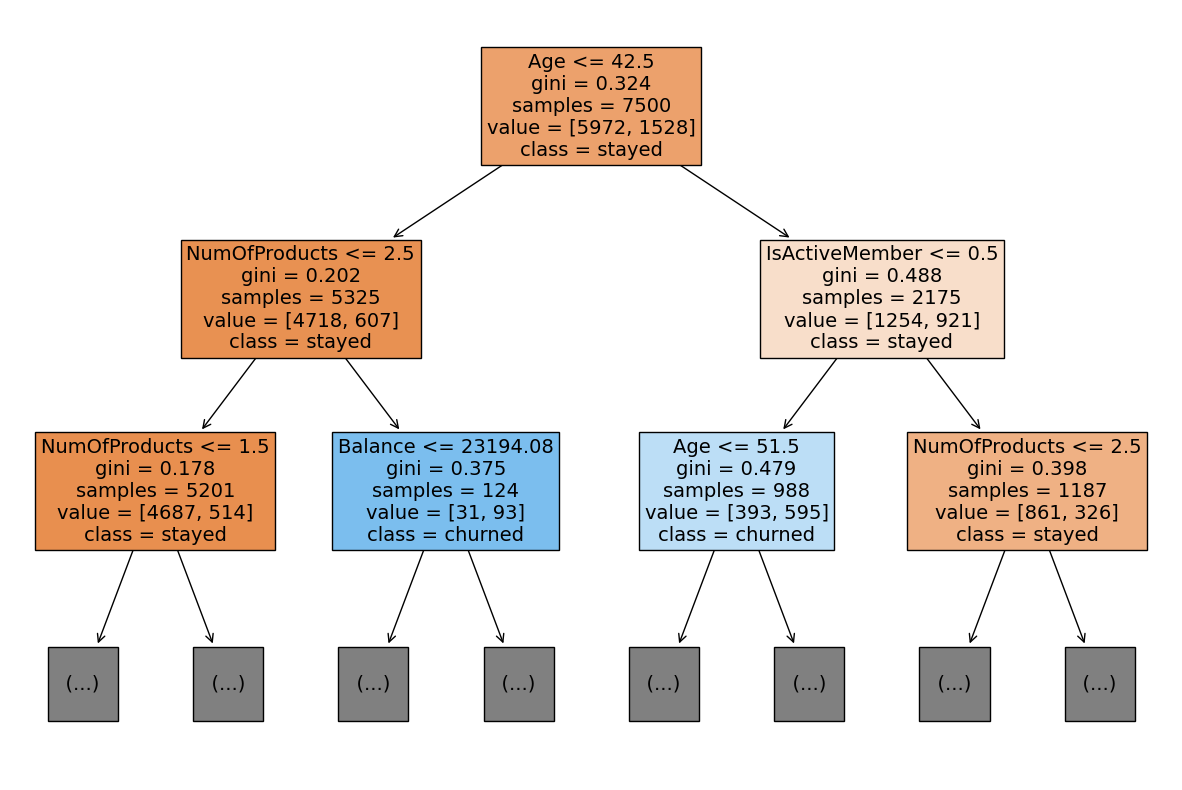

In [58]:
# Plot the tree
plt.figure(figsize=(15,10))
plot_tree(tree_base, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()

### Feature Importance

Create table of features and their gini importance


In [59]:
tree_base_importances = pd.DataFrame(tree_base.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree_base_importances = tree_base_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree_base_importances = tree_base_importances[tree_base_importances['gini_importance'] != 0]
tree_base_importances

,gini_importance
Age,0.227261
EstimatedSalary,0.166886
Balance,0.160279
CreditScore,0.143719
NumOfProducts,0.121546
Tenure,0.072263
IsActiveMember,0.056962
Geography_Germany,0.020942
HasCrCard,0.013342
Geography_Spain,0.010759


Explain gini impurity

In [60]:
#Feature's gini scores as a percent
feat1 = (tree_base_importances.iat[0,0])*100
feat2 = (tree_base_importances.iat[1,0])*100
feat3 = (tree_base_importances.iat[2,0])*100

# Explain gini scores for first 3 features
print(f'- {tree_base_importances.index[0]} is responsible for {feat1:.0f}% of overall reduction of gini impurity in the model')
print(f'- {tree_base_importances.index[1]} is responsible for {feat2:.0f}% of overall reduction of gini impurity in the model')
print(f'- {tree_base_importances.index[2]} is responsible for {feat3:.0f}% of overall reduction of gini impurity in the model')

- Age is responsible for 23% of overall reduction of gini impurity in the model
- EstimatedSalary is responsible for 17% of overall reduction of gini impurity in the model
- Balance is responsible for 16% of overall reduction of gini impurity in the model


Plot

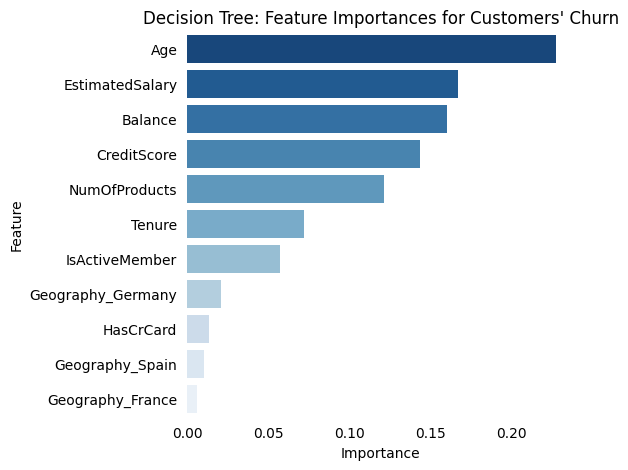

In [61]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=tree_base_importances, x="gini_importance", y=tree_base_importances.index, palette='Blues_r')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

plt.title("Decision Tree: Feature Importances for Customers' Churn", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

## Hyperparameter Tuning
 

#### Imports

In [82]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# This module lets us save our models once we fit them.
import pickle

In [78]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[2, 4, 6, 8, 10, None],
             'min_samples_leaf': [2, 5, 10, 15,20],
             'min_samples_split': [2, 4, 6, 8, 10]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree_tuned = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='f1')

#### Fit the data (X_train, y_train) to the GridSearchCV object (model)

In [80]:
%%time
tree_tuned.fit(X_train, y_train)

CPU times: total: 15.5 s
Wall time: 15.5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

### Save Model

In [83]:
# Define a path to the folder where you want to save the model
path = 'C:/Users/tunhi/OneDrive/Documents/Github/bankchurn/models/'

# Pickle the model
with open(path+'tree_cv_model.pickle', 'wb') as to_write:
    pickle.dump(tree_tuned, to_write)


In [84]:
# Read in pickled model
with open(path + 'tree_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

### Best Parameters 
Now that the model is fit and cross-validated, we can use the best_estimator_ attribute to inspect the hyperparameter values that yielded the highest F1 (refit=f1) score during cross-validation.

In [81]:
# Check best parameters
tree_tuned.best_params_

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2}

### Best Validation Score
Identify the best f1 score achieved by the decision tree model on the training set.

In [86]:
# Check best AUC score on CV
print("Best Avg. Validation Score: ", "%.4f" % tree_tuned.best_score_)

Best Avg. Validation Score:  0.5848


### Save Results
Create Table with best Model's metric scores

In [87]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                        })
  
    return table

In [88]:
# Get all CV scores
tuned_results = make_results('decision tree CV', tree_tuned, 'f1')

# View the results
tuned_results

,model,precision,recall,F1,accuracy
0,decision tree CV,0.720719,0.494141,0.584798,0.857333


In [90]:
# Concatenate the results to the master table
results = pd.concat([baseline_results, tuned_results])

# Save results table as csv
results.to_csv("models/model_results_table.csv")

results

,model,precision,recall,F1,accuracy
1,decision tree baseline,0.497227,0.528487,0.512381,0.795200
0,decision tree CV,0.720719,0.494141,0.584798,0.857333


### Results
Tuning the decision tree increased F1 from 51% to 58%. Which is an improvement but still not great.

# Model 2: Random Forest

### Imports


In [91]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
roc_auc_score,f1_score, confusion_matrix, ConfusionMatrixDisplay

# This module lets us save our models once we fit them.
import pickle

### Split the Data into train and test sets

In [92]:
# Define the y (target) variable
y = df_model['Exited']

# Define the X (predictor) variables
X = df_model.drop('Exited', axis=1)

# Split the dat into training, validating, and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

## Cross-validation with GridSearchCV

In [93]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']


# Instantiate GridSearch
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')


Fit the random forest model to the training data.

In [ ]:
%%time
rf_cv.fit(X_train, y_train)


Use`pickle` to save a fit model.

In [77]:
# Define a path to the folder where you want to save the model
path = 'C:/Users/tunhi/OneDrive/Documents/Github/bankchurn/models/'

# Pickle the model
with open(path+'rf_cv_model.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)
    


In [94]:
# Read in pickled model
with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

## Best Parameters
Identify the optimal values for the parameters of the random forest model.

In [95]:
# check the hyperparameters that had the best average score across all the cross-validation folds.
rf_cv.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 75}

## Best Validation Score
Identify the best score achieved by the random forest model on the training set.

In [96]:
#  check the best average  score of this model on the validation folds, 
rf_cv.best_score_

0.5981681137185328

## Save Results

In [97]:
# Get all CV scores
rf_cv_results = make_results('random forest CV', rf_cv, 'f1')

# View the results
rf_cv_results

,model,precision,recall,F1,accuracy
0,random forest CV,0.763367,0.492793,0.598168,0.8652


In [98]:
# Concatenate the random forest results to the master table
results = pd.concat([results, rf_cv_results])

# Save results table as csv
results.to_csv("models/model_results_table.csv")

results

,model,precision,recall,F1,accuracy
1,decision tree baseline,0.497227,0.528487,0.512381,0.795200
0,decision tree CV,0.720719,0.494141,0.584798,0.857333
0,random forest CV,0.763367,0.492793,0.598168,0.865200


# Model 3: XGBoost Model

#### Imports

In [99]:
# This is the classifier
from xgboost import XGBClassifier 
from xgboost import plot_tree

# This is the function that helps plot feature importance 
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# This module lets us save our models once we fit them.
import pickle

#### Split the Data

In [100]:
# Define the y (target) variable
y = df_model['Exited']

# Define the X (predictor) variables
X = df_model.drop('Exited', axis=1)

# Split the dat into training, validating, and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Hyperparameter Tuning 

In [101]:
# Instantiate the classifier
#  model is performing a binary classification task that outputs a logistic probability. 
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

# Create a dictionary of hyperparameters to search over.
cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }  

# Create a dictionary of scoring metrics to capture.
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the `GridSearchCV` object. Pass as arguments:
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

### Fit Training data to model

In [ ]:
# Run Model
xgb_cv.fit(X_train, y_train)

### Save Model


Use`pickle` to save a fit model.

In [ ]:
# Define a path to the folder where you want to save the model
path = 'C:/Users/tunhi/OneDrive/Documents/Github/bankchurn/models/'

# Pickle the model
with open(path+'xgb_cv_model.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)


In [103]:
# Read in pickled model
with open(path + 'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

## Best Parameters
Identify the optimal values for the parameters of the random forest model.

In [104]:
# check the hyperparameters that had the best average score across all the cross-validation folds.
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 125}

## Best Validation Score
Identify the best score achieved by the random forest model on the training set.

In [105]:
#  check the best average  score of this model on the validation folds, 
xgb_cv.best_score_

0.6063407759513384

## Save Results

In [106]:
# Get all CV scores
xgb_cv_results = make_results('XGBoost CV', xgb_cv, 'f1')

# View the results
xgb_cv_results

,model,precision,recall,F1,accuracy
0,XGBoost CV,0.732326,0.517673,0.606341,0.863067


In [107]:
# Concatenate the random forest results to the master table
results = pd.concat([results, xgb_cv_results]).sort_values(by=['F1'], ascending=False)

# Save results table as csv
results.to_csv("models/model_results_table.csv")


results

,model,precision,recall,F1,accuracy
0,XGBoost CV,0.732326,0.517673,0.606341,0.863067
0,random forest CV,0.763367,0.492793,0.598168,0.865200
0,decision tree CV,0.720719,0.494141,0.584798,0.857333
1,decision tree baseline,0.497227,0.528487,0.512381,0.795200


------------

# Model Selection (XGBoost)

Out of the 4 models, XGBoost model has the highest F1 score; hence, this will be our champion model to predict on the test data.

#### Predict on the test data

In [108]:
# Predict on test data
xgb_cv_pred = xgb_cv.predict(X_test)

### Scores

In [109]:
# Get evaluation scores
ac_final = accuracy_score(y_test, xgb_cv_pred)
f1_final = f1_score(y_test, xgb_cv_pred)
rc_final = recall_score(y_test, xgb_cv_pred)
pc_final = precision_score(y_test, xgb_cv_pred)

print("Final XGB Model Evaluation Scores:")
print('Accuracy: ', '%.3f' %ac_final)
print('Precision: ', '%.3f' %pc_final)
print('Recall: ', '%.3f' %rc_final)
print('F1 score: ', '%.3f' %f1_final)

Final XGB Model Evaluation Scores:
Accuracy:  0.850
Precision:  0.694
Recall:  0.468
F1 score:  0.559


- Accuracy score od 0.92 means this model is 92% accurate, however, the best metric for this model was selected previously, which was f1. 
- f1 score of 0.778 indicates an above average predicting power from the model. Since f1 balances the precision and recall performance to give a combined assessment of how well this model delivers predictions.
- Precision score of 0.899 suggest the model is good at predicting true positives. This means the model is good at predicting if a customer would leave.
- A recall score of 0.686 is decent. which means the model does an ok job of predicting when a customer will not leave. 

### Save results

In [110]:
xgb_final_score = {
                  'model': 'XGBoost final',
                  'precision': pc_final,
                  'recall': rc_final,
                  'F1': f1_final,
                  'accuracy': ac_final,

}
xgb_final_results =pd.DataFrame(xgb_final_score,index=[1])
xgb_final_results

,model,precision,recall,F1,accuracy
1,XGBoost final,0.693878,0.467583,0.558685,0.8496


In [111]:
# Concatenate the random forest results to the master table
results = pd.concat([results, xgb_final_results]).sort_values(by=['F1'], ascending=False)

# Save results table as csv
results.to_csv("models/model_results_table.csv")


results

,model,precision,recall,F1,accuracy
0,XGBoost CV,0.732326,0.517673,0.606341,0.863067
0,random forest CV,0.763367,0.492793,0.598168,0.865200
0,decision tree CV,0.720719,0.494141,0.584798,0.857333
1,XGBoost final,0.693878,0.467583,0.558685,0.849600
1,decision tree baseline,0.497227,0.528487,0.512381,0.795200


### Confusion Matrix

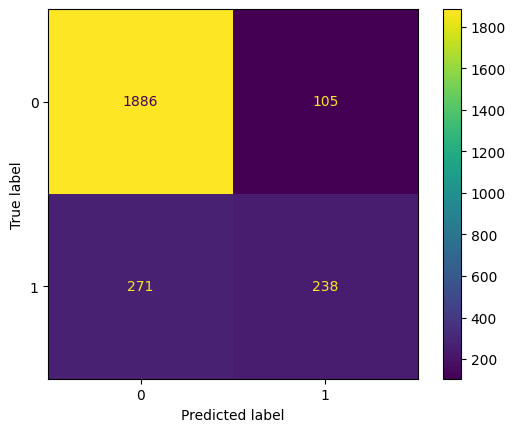

In [112]:
xgb_cv_pred = xgb_cv.predict(X_test)
cm= confusion_matrix(y_test, xgb_cv_pred, labels=xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

disp.plot()
plt.show()

In [114]:
# Print confusion matrix results
tn, fp, fn, tp = cm.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


# Print shape of test data
print('')
print("Total Test Data:", tn+fp+fn+tp)

# Print Total churn
print('')
print("Total Churn:", fn+tp)

True Negatives:  1886
False Positives:  105
False Negatives:  271
True Positives:  238

Total Test Data: 2500

Total Churn: 509


## Results Summary

- Of the 2500 test samples, 509 customers left and the model correctly predicted 349 of thes customers
- When the model makes an error, it's typically Type II error which gives a false negative, which fails to predict that customer will leave.

### Plot Tree

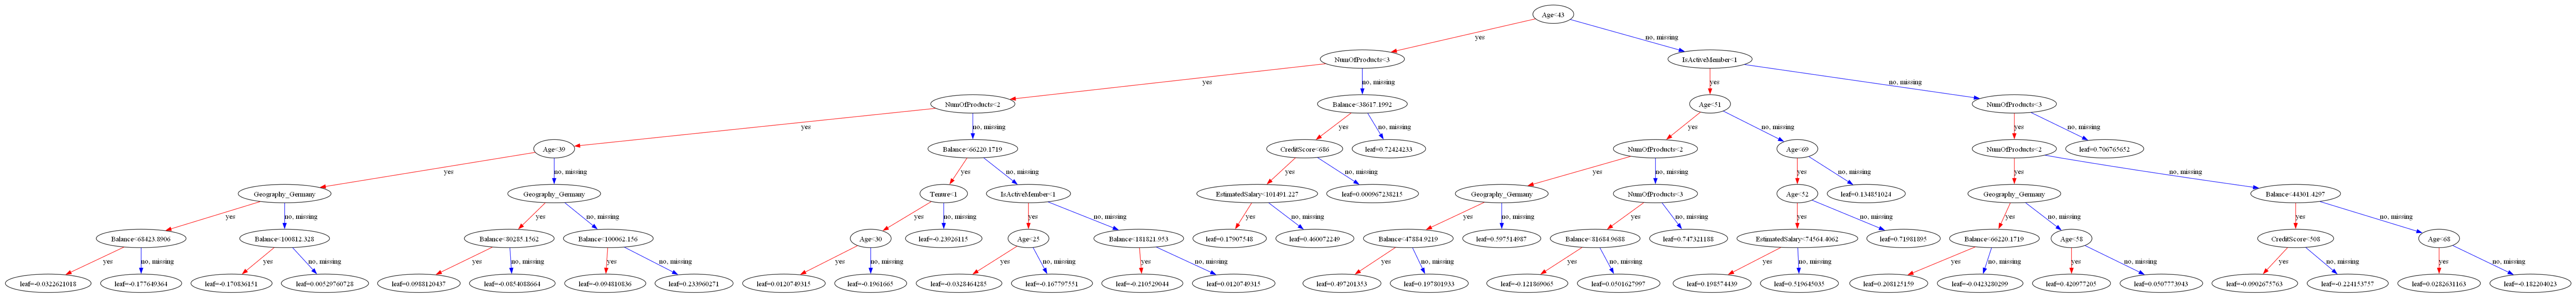

In [100]:
fig, ax = plt.subplots(figsize=(100, 20))
plot_tree(xgb_cv.best_estimator_, ax=ax, dpi=2000)
plt.show()


## Feature importance

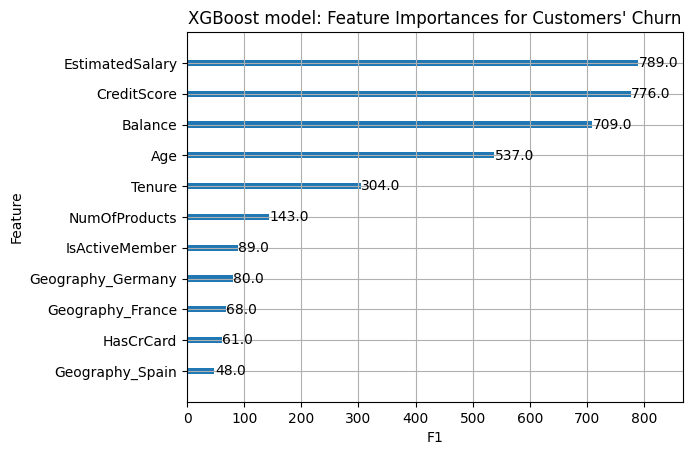

In [101]:
plot_importance(xgb_cv.best_estimator_)
plt.title("XGBoost model: Feature Importances for Customers' Churn", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("F1")
plt.show();

From the model, Estimated Salary, CreditScore, Balance, and Age are the the most importance features for this model. 